# Smart Lender - Applicant Credibility Prediction For Loan Approval

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/dataset/LoanDataset.csv')

In [ ]:
prim = loan_data.copy()
prim1 = prim.drop(['Loan_ID'], axis=1)
frames = [prim1, new3]
 
res1 = pd.concat(frames)
res1

In [ ]:
df = pd.DataFrame(prim1,index=[i for i in range(614)])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,29000,0.0,710.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,41060,0.0,400.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,80720,2400.0,2530.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,75830,0.0,1870.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,45830,0.0,1330.0,360.0,0.0,Semiurban,N


In [ ]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## EDA

## Univariate Analysis

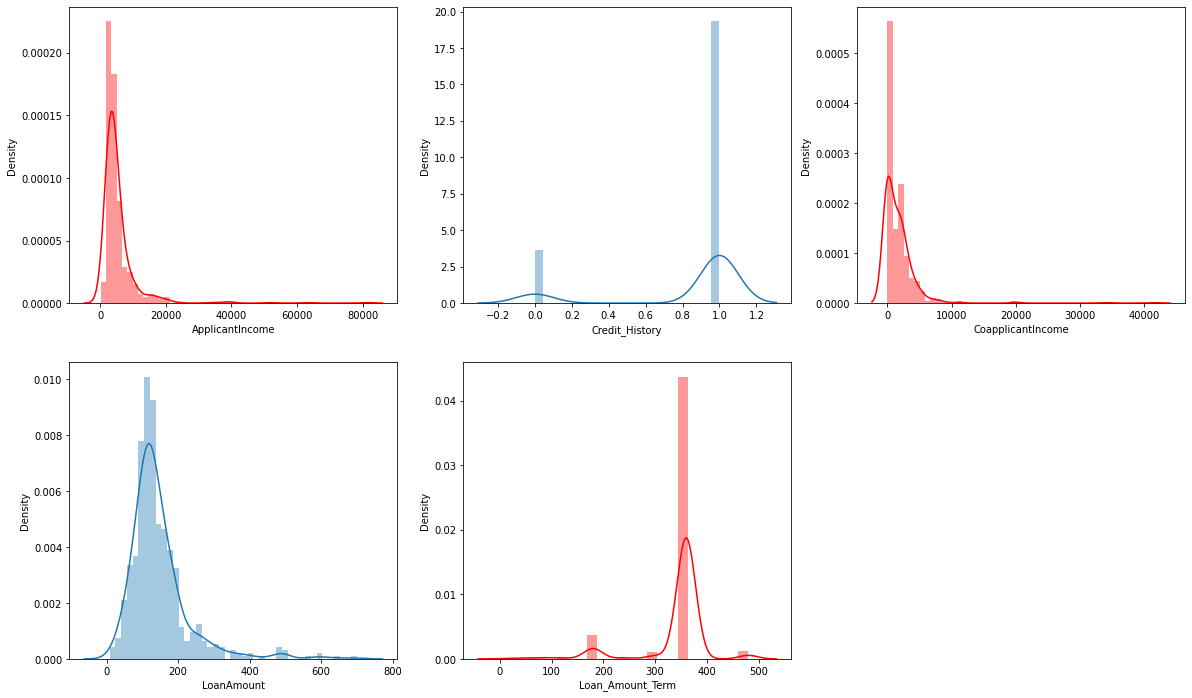

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(231)
sns.distplot(loan_data['ApplicantIncome'], color='r')
plt.subplot(232)
sns.distplot(loan_data['Credit_History'])
plt.subplot(233)
sns.distplot(loan_data['CoapplicantIncome'], color='r')
plt.subplot(234)
sns.distplot(loan_data['LoanAmount'])
plt.subplot(235)
sns.distplot(loan_data['Loan_Amount_Term'], color='r')
plt.show()

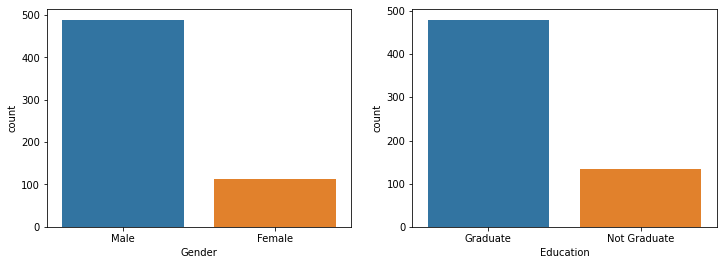

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(loan_data['Gender'])
plt.subplot(122)
sns.countplot(loan_data['Education'])
plt.show()

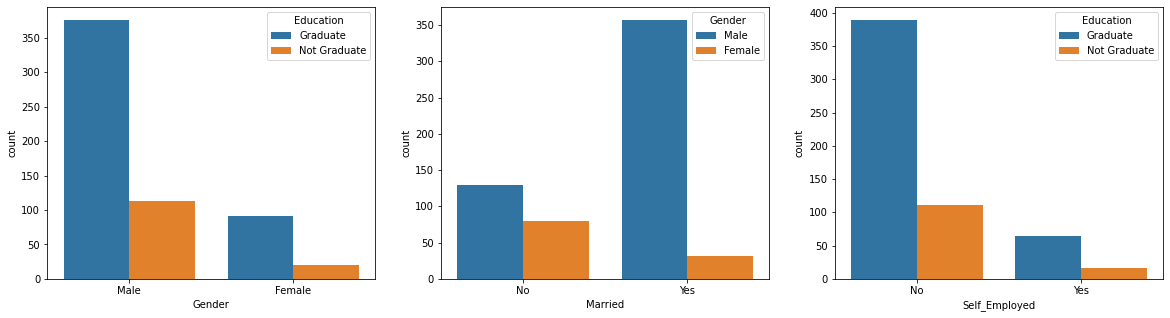

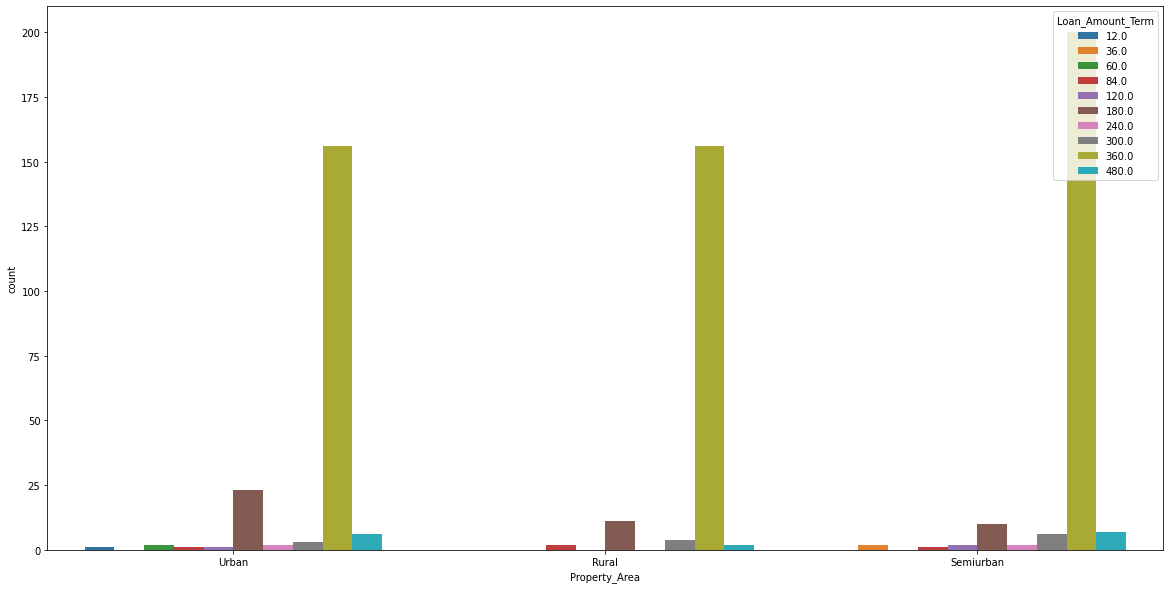

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(loan_data['Gender'], hue=loan_data['Education'])
plt.subplot(132)
sns.countplot(loan_data['Married'], hue = loan_data['Gender'])
plt.subplot(133)
sns.countplot(loan_data['Self_Employed'], hue = loan_data['Education'])
plt.show()
plt.figure(figsize=(20,10))
sns.countplot(loan_data['Property_Area'], hue = loan_data['Loan_Amount_Term'])
plt.show()

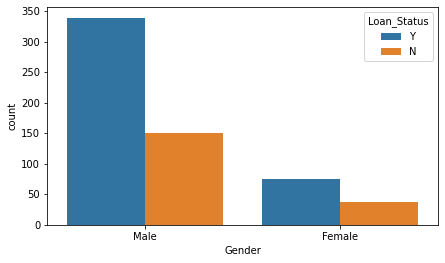

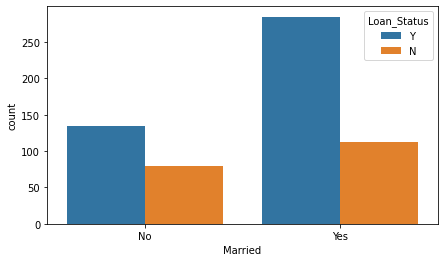

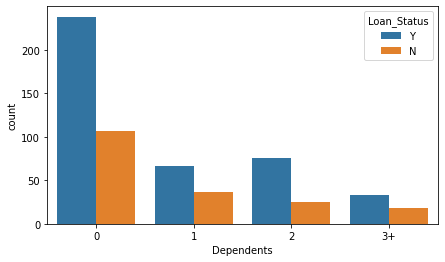

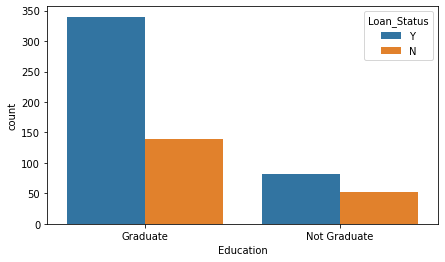

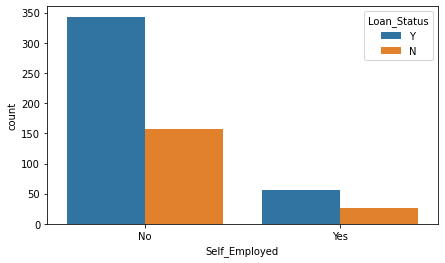

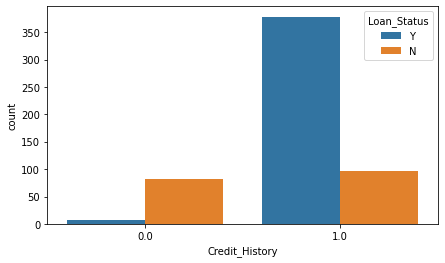

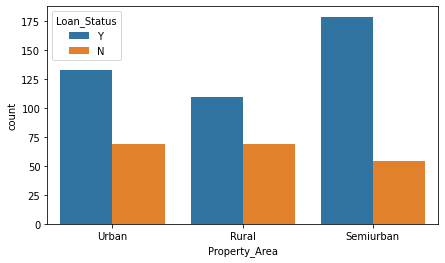

In [ ]:
temp_data = loan_data.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status'],axis=1)
cols = temp_data.columns
for c in cols:

  plt.figure(c,figsize=(7,4))
  sns.countplot(temp_data[c], hue= loan_data['Loan_Status'])

plt.show()

In [ ]:
loan_data['ApplicantIncome'].max()
maximum_income = loan_data['ApplicantIncome'].unique().max()
minimum_income = loan_data['ApplicantIncome'].unique().min()
print(maximum_income, minimum_income)

81000 150


In [ ]:
loan_data['CoapplicantIncome'].max()
maximum_income = loan_data['CoapplicantIncome'].unique().max()
minimum_income = loan_data['CoapplicantIncome'].unique().min()
print(maximum_income, minimum_income)

41667.0 0.0


In [ ]:
loan_data['LoanAmount'].max()
maximum_loan = loan_data['LoanAmount'].unique().max()
minimum_loan = loan_data['LoanAmount'].unique().min()
print(maximum_income, minimum_income)

41667.0 0.0


In [ ]:
copy_data = loan_data.copy()
bin_range = [150, 10000, 20000, 30000, 40000, 50000, 60000,70000, 81000]
copy_data['Income_group'] = pd.cut(x=copy_data['ApplicantIncome'], bins= bin_range)
copy_data['Income_group'].value_counts()

(150, 10000]      561
(10000, 20000]     40
(20000, 30000]      5
(30000, 40000]      4
(50000, 60000]      1
(60000, 70000]      1
(70000, 81000]      1
(40000, 50000]      0
Name: Income_group, dtype: int64

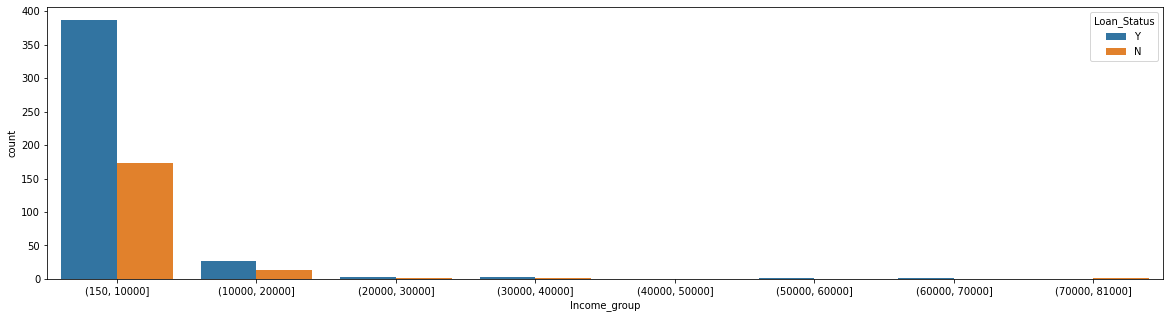

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x= copy_data['Income_group'], hue = copy_data['Loan_Status'])
plt.show()

In [ ]:
bin_range = [1, 10000, 20000, 30000, 42000]
copy_data['CoIncome_group'] = pd.cut(x=copy_data['CoapplicantIncome'], bins= bin_range)
copy_data['CoIncome_group'].value_counts()

(1, 10000]        335
(10000, 20000]      4
(30000, 42000]      2
(20000, 30000]      0
Name: CoIncome_group, dtype: int64

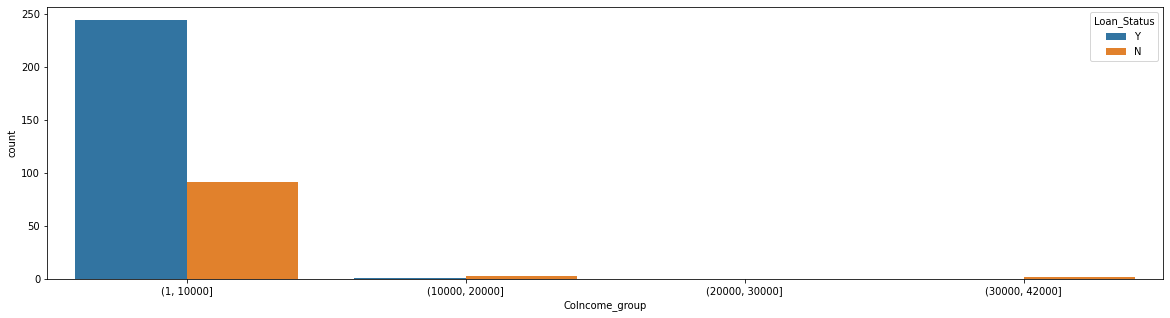

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x= copy_data['CoIncome_group'], hue = copy_data['Loan_Status'])
plt.show()

### Multivariate Analysis

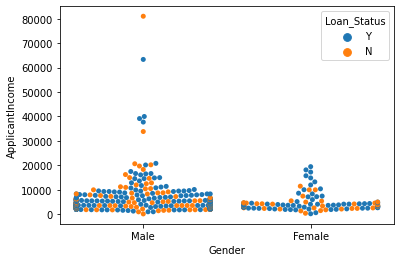

In [ ]:
sns.swarmplot(loan_data['Gender'],loan_data['ApplicantIncome'], hue=loan_data['Loan_Status'])

### Descriptive Analysis

In [ ]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


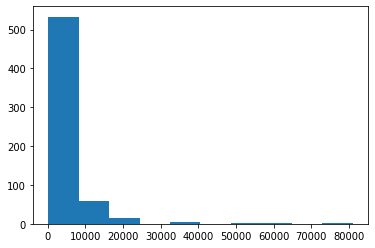

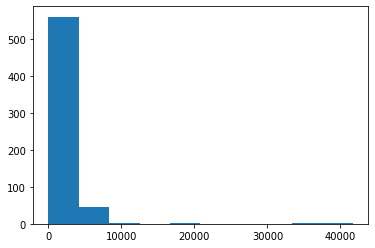

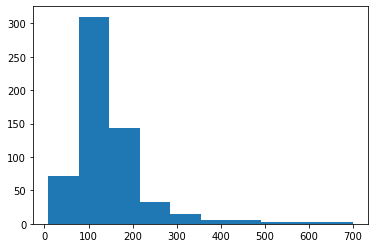

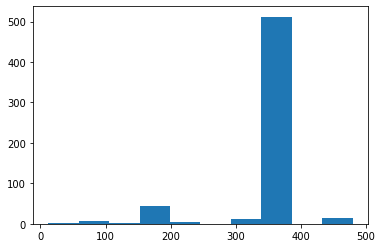

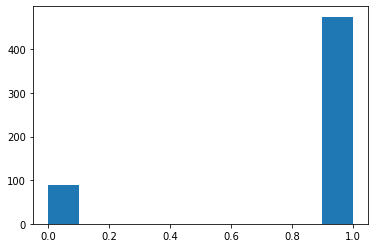

In [ ]:
stat_data = loan_data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
for i in stat_data:
  plt.hist(loan_data[i])
  plt.show()